In [1]:
import pandas as pd
import numpy as np


filepath = '../../data/sierraleone-bumbuna.csv'

# loading data
df = pd.read_csv(filepath)

print("Data loaded successfully!")
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

Data loaded successfully!
First 5 rows of the DataFrame:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN

In [2]:
print(df.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [3]:
missing_counts = df.isna().sum()
print(missing_counts)

#get total_rows and calculate the missing percentage
total_rows = len(df)
missing_percentage = (missing_counts / total_rows) * 100

#store the cols with missing more than 5%
cols_with_high_missing = missing_percentage[missing_percentage > 5]

#check if there are columns with high missing values 
if not cols_with_high_missing.empty:
    print(cols_with_high_missing)
else:
    print("No columns found with more than 5% missing values.")

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Comments    100.0
dtype: float64


In [4]:
zscore_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# calculate mean and median
mean = df.loc[:, zscore_cols].mean()
std = df.loc[:, zscore_cols].std()

# calculate z-scores
z_scores = (df.loc[:, zscore_cols] - mean) / std

# Check where the absolute Z-score is greater than 3
outlier_mask_zscore = (z_scores.abs() > 3).any(axis=1)

# This creates a new boolean column 'is_outlier_zscore' which is True for flagged rows
df.loc[:, 'is_outlier_zscore'] = outlier_mask_zscore

# --- Optional: View the flagged rows ---
print("--- Rows flagged as outliers based on |Z| > 3 ---")
print(df[df['is_outlier_zscore']].head()) 

--- Rows flagged as outliers based on |Z| > 3 ---
            Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653  2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654  2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655  2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656  2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657  2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   

     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
653     1.1      0.5   81.4      7.9  1002         0            0.0   50.4   
654     2.4      0.4   74.6     12.1  1002         0            0.0   51.6   
655     2.1      0.5   66.4     14.6  1002         0            0.0   52.4   
656     1.6      0.6   90.2      7.0  1002         0            0.0   53.4   
657     1.6      0.6  108.5      7.9  1002         0            0.0   54.6   

     TModB  Commen

In [5]:
# Drop
print("Dropping 'Comments' column due to 100% missing values.")
df = df.drop('Comments', axis=1)

print(df.columns)

Dropping 'Comments' column due to 100% missing values.
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'is_outlier_zscore'],
      dtype='object')


In [7]:
print("--- Handling Unrealistic Irradiance Values ---")

# Define the cleaning thresholds for each irradiance column
irradiance_cleaning_rules = {
    'GHI': {'min': 0, 'max': 1200}, 
    'DNI': {'min': 0, 'max': 1100}, 
    'DHI': {'min': 0, 'max': 300}   
}

# List of columns to apply these rules to
irradiance_cols_to_clean = ['GHI', 'DNI', 'DHI']

# Apply the cleaning rules to each column
for col in irradiance_cols_to_clean:
    if col in df.columns:
        print(f"Cleaning column '{col}'...")


        min_threshold = irradiance_cleaning_rules[col]['min']
        # Count values below the minimum before cleaning
        below_min_count = (df[col] < min_threshold).sum()
        if below_min_count > 0:
             # Use np.maximum to keep the larger value between the current value and the min threshold
             # This effectively sets values below the min threshold *to* the min threshold
             df[col] = np.maximum(df[col], min_threshold)
             print(f" - Replaced {below_min_count} values below {min_threshold} with {min_threshold}.")
        else:
            print(f" - No values found below {min_threshold}.")

  
        max_threshold = irradiance_cleaning_rules[col]['max']
         # Count values above the maximum before cleaning
        above_max_count = (df[col] > max_threshold).sum()
        if above_max_count > 0:
            # Use np.minimum to keep the smaller value between the current value and the max threshold
            # This effectively sets values above the max threshold *to* the max threshold
            df[col] = np.minimum(df[col], max_threshold)
            print(f" - Capped {above_max_count} values above {max_threshold} with {max_threshold}.")
        else:
            print(f" - No values found above {max_threshold}.")

    else:
        print(f" - Column '{col}' not found in DataFrame. Skipping cleaning for this column.")

print("\nIrradiance value cleaning complete (negatives set to 0, highs capped).")

--- Handling Unrealistic Irradiance Values ---
Cleaning column 'GHI'...
 - No values found below 0.
 - No values found above 1200.
Cleaning column 'DNI'...
 - No values found below 0.
 - No values found above 1100.
Cleaning column 'DHI'...
 - No values found below 0.
 - No values found above 300.

Irradiance value cleaning complete (negatives set to 0, highs capped).


In [8]:
# Define the output file path relative to your script
output_filepath = '../../data/sierraleone_clean.csv'

# Export the DataFrame to CSV file
df.to_csv(output_filepath, index=False)

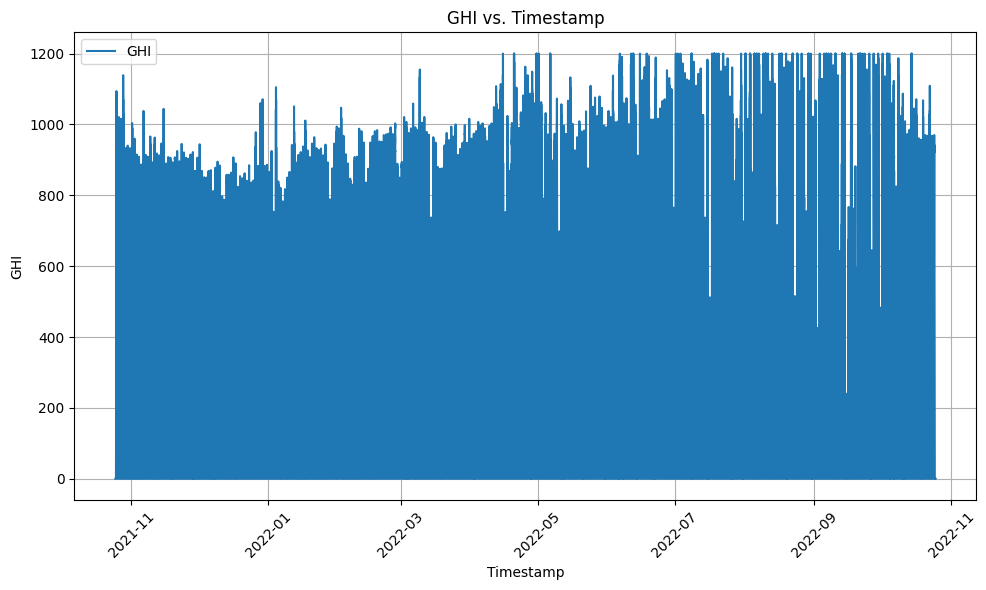

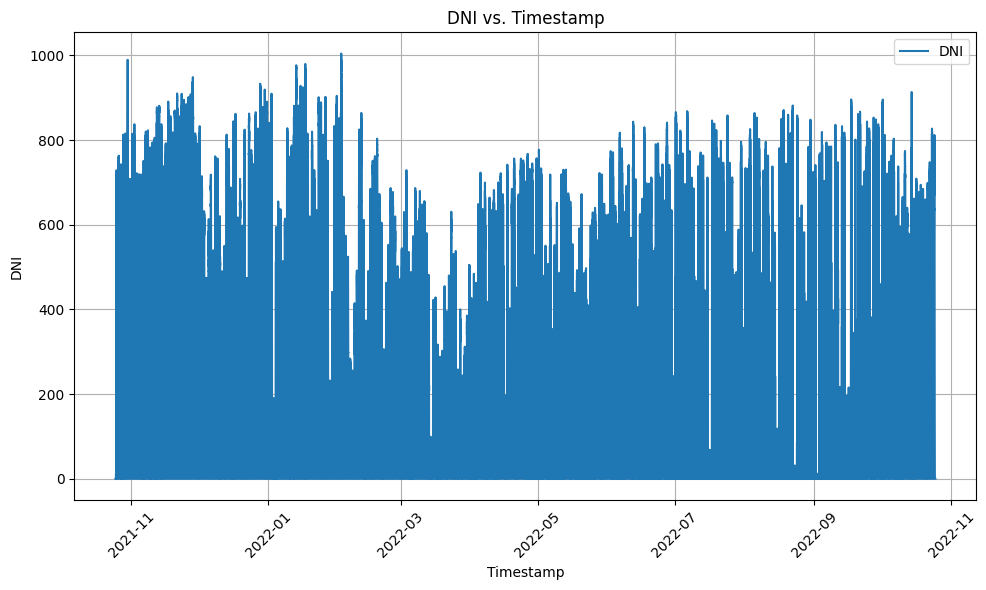

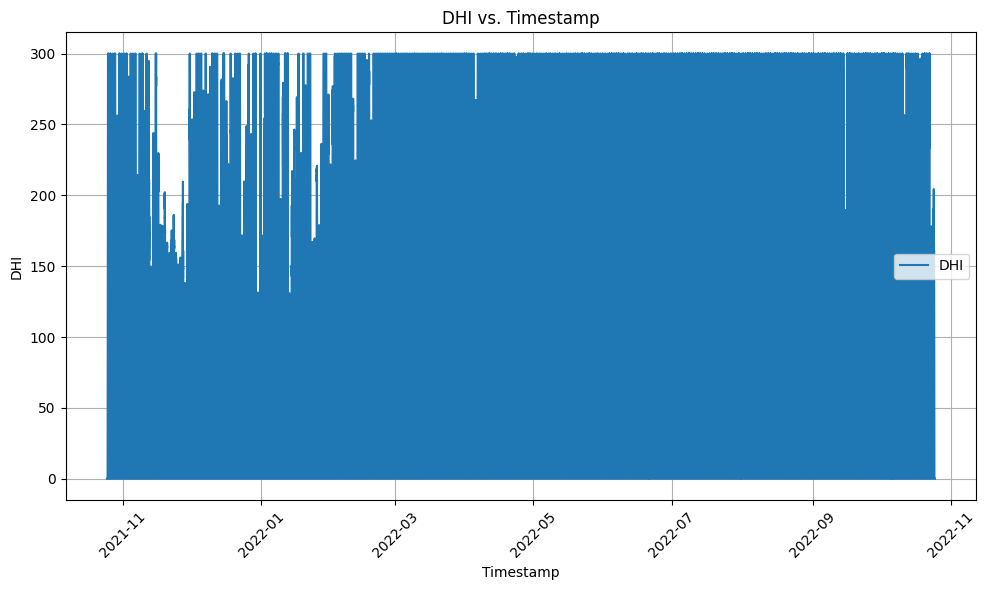

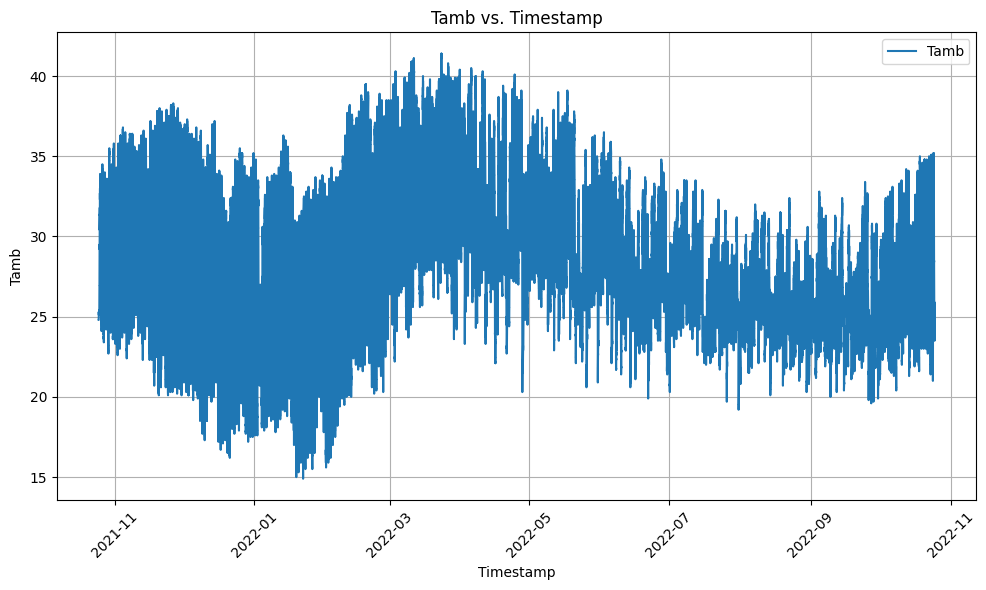

/tmp/ipykernel_5751/4208882732.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/ca/code/KAIM/solar-challenge-week1/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


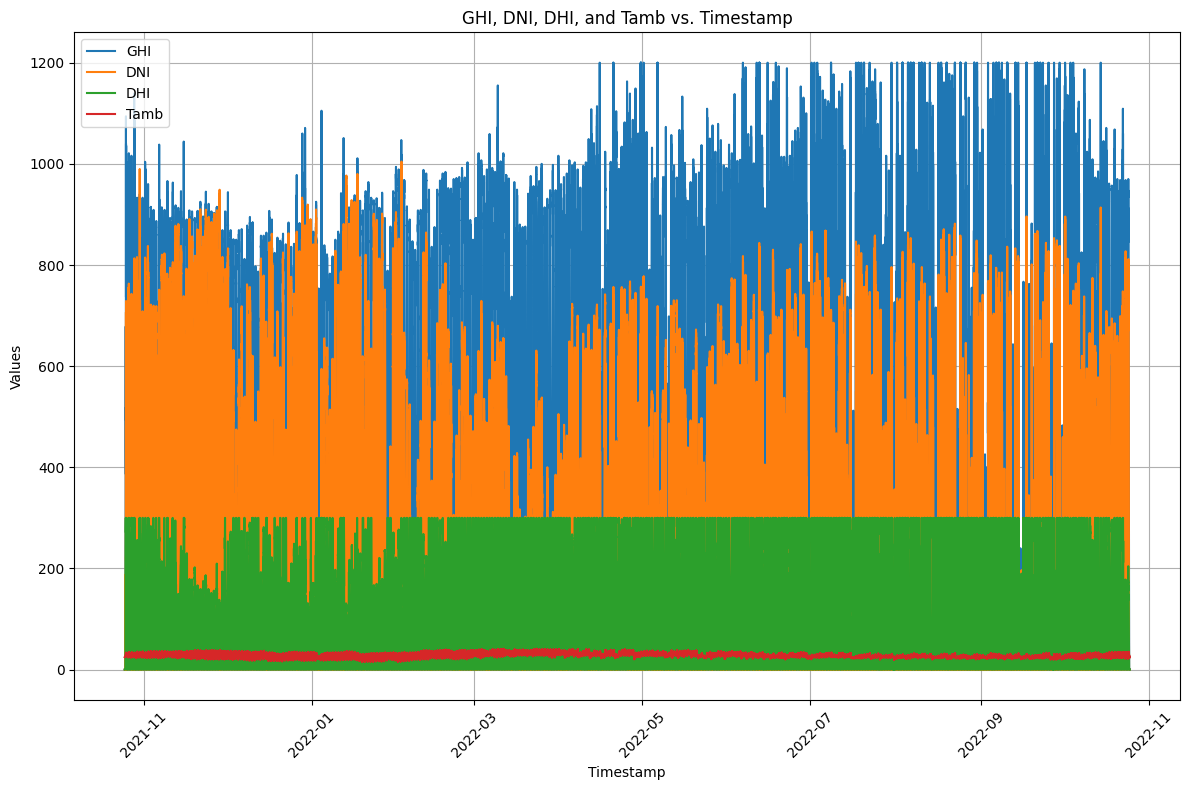

In [9]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../../data/togo_clean.csv')

# Ensure 'Timestamp' is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for time series plotting
df.set_index('Timestamp', inplace=True)

# List of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'Tamb']

# Define colors for combined plot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# 1. Separate line plots for each variable
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[var], label=var, color='tab:blue')
    plt.title(f'{var} vs. Timestamp')
    plt.xlabel('Timestamp')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Combined line plot with all variables
plt.figure(figsize=(12, 8))
for var, color in zip(variables, colors):
    plt.plot(df.index, df[var], label=var, color=color)
plt.title('GHI, DNI, DHI, and Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()